# Practical 4B

In [1]:
def test_stationarity(dataFrame, var):
  dataFrame['rollMean']=dataFrame[var].rolling(window=12).mean()
  dataFrame['rollStd']=dataFrame[var].rolling(window=12).std()

  from statsmodels.tsa.stattools import adfuller
  import seaborn as sns
  adfTest = adfuller(dataFrame[var], autolag='AIC')
  stats=pd.Series(adfTest[0:4],index=['Test Statistic','p-value', '#lags used', 'number of observations used'])
  print(stats)

  for key, value in adfTest[4].items():
    print('\t%s: %.3f' % (key, value))

  sns.lineplot(data=dataFrame, x=dataFrame.index, y=var)
  sns.lineplot(data=dataFrame, x=dataFrame.index, y='rollMean')
  sns.lineplot(data=dataFrame, x=dataFrame.index, y='rollStd')

In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv('AirPassengers.csv', index_col='Month')
data.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


Test Statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
	1%: -3.482
	5%: -2.884
	10%: -2.579


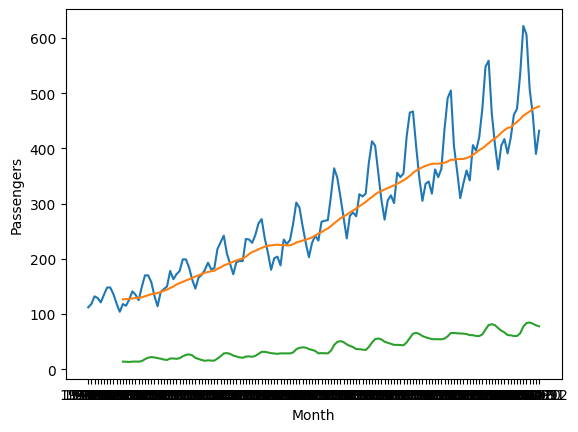

In [4]:
test_stationarity(data,'Passengers')

In [5]:
air_df=data[['Passengers']]
air_df.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [6]:
air_df['shift']=air_df.Passengers.shift()
air_df['shiftDiff']=air_df.Passengers - air_df['shift']
air_df.head()

C:\Users\Radhika\AppData\Local\Temp\ipykernel_12632\715476836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shift']=air_df.Passengers.shift()


,Passengers,shift,shiftDiff
Month,,,
1949-01,112,NaN,NaN
1949-02,118,112.0,6.0
1949-03,132,118.0,14.0
1949-04,129,132.0,-3.0
1949-05,121,129.0,-8.0


C:\Users\Radhika\AppData\Local\Temp\ipykernel_12632\180683822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']=dataFrame[var].rolling(window=12).mean()
C:\Users\Radhika\AppData\Local\Temp\ipykernel_12632\180683822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd']=dataFrame[var].rolling(window=12).std()


Test Statistic                  -2.829267
p-value                          0.054213
#lags used                      12.000000
number of observations used    130.000000
dtype: float64
	1%: -3.482
	5%: -2.884
	10%: -2.579


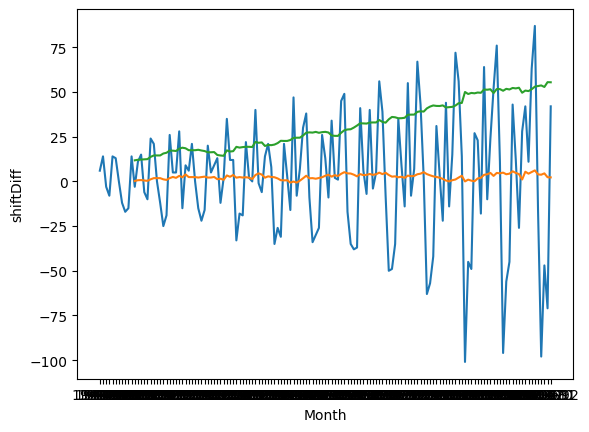

In [7]:
test_stationarity(air_df.dropna(),'shiftDiff')

In [8]:
    log_df=air_df[['Passengers']]
log_df['log']=np.log(log_df['Passengers'])
log_df.head()

C:\Users\Radhika\AppData\Local\Temp\ipykernel_12632\2964174300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df['log']=np.log(log_df['Passengers'])


,Passengers,log
Month,,
1949-01,112,4.718499
1949-02,118,4.770685
1949-03,132,4.882802
1949-04,129,4.859812
1949-05,121,4.795791


Test Statistic                  -1.717017
p-value                          0.422367
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
	1%: -3.482
	5%: -2.884
	10%: -2.579


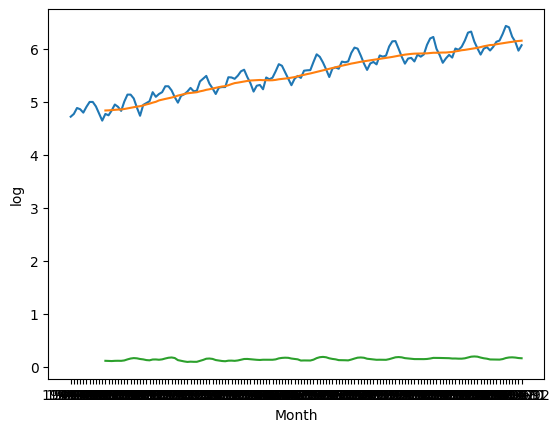

In [9]:
test_stationarity(log_df,'log')

In [10]:
sqrt_df=air_df[['Passengers']]
sqrt_df['sqrt']=np.sqrt(air_df['Passengers'])
sqrt_df.head()


C:\Users\Radhika\AppData\Local\Temp\ipykernel_12632\286983652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqrt_df['sqrt']=np.sqrt(air_df['Passengers'])


,Passengers,sqrt
Month,,
1949-01,112,10.583005
1949-02,118,10.862780
1949-03,132,11.489125
1949-04,129,11.357817
1949-05,121,11.000000


Test Statistic                  -0.345854
p-value                          0.918754
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
	1%: -3.482
	5%: -2.884
	10%: -2.579


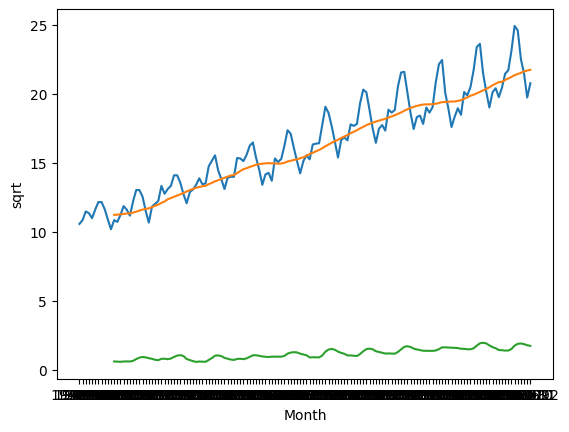

In [11]:
test_stationarity(sqrt_df,'sqrt')

In [12]:
cbrt_df=air_df[['Passengers']]
cbrt_df['cbrt']=np.cbrt(air_df['Passengers'])
cbrt_df.head()


C:\Users\Radhika\AppData\Local\Temp\ipykernel_12632\3141329669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbrt_df['cbrt']=np.cbrt(air_df['Passengers'])


,Passengers,cbrt
Month,,
1949-01,112,4.820285
1949-02,118,4.904868
1949-03,132,5.091643
1949-04,129,5.052774
1949-05,121,4.946087


Test Statistic                  -0.810035
p-value                          0.816157
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
	1%: -3.482
	5%: -2.884
	10%: -2.579


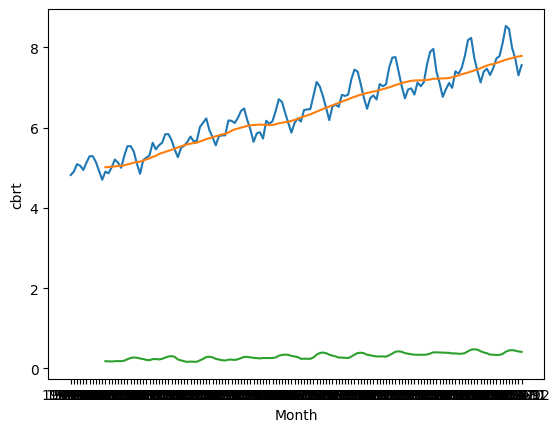

In [13]:
test_stationarity(cbrt_df,'cbrt')

In [14]:
log_df2=log_df[['Passengers','log']]
log_df2['log_sqrt']=np.sqrt(log_df['log'])
log_df2.head()

C:\Users\Radhika\AppData\Local\Temp\ipykernel_12632\3809193095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df2['log_sqrt']=np.sqrt(log_df['log'])


,Passengers,log,log_sqrt
Month,,,
1949-01,112,4.718499,2.172211
1949-02,118,4.770685,2.184190
1949-03,132,4.882802,2.209706
1949-04,129,4.859812,2.204498
1949-05,121,4.795791,2.189929


Test Statistic                  -1.942528
p-value                          0.312326
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
	1%: -3.482
	5%: -2.884
	10%: -2.579


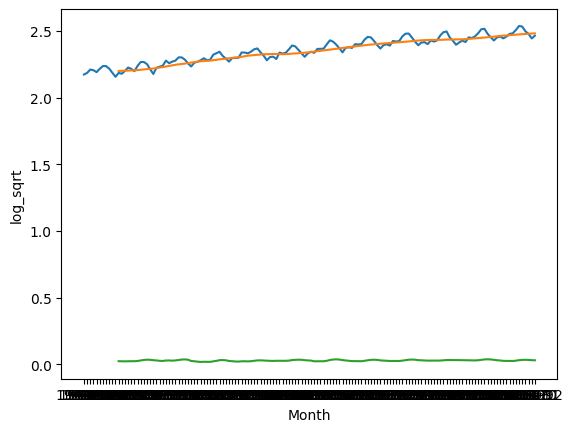

In [15]:
test_stationarity(log_df2,'log_sqrt')

In [16]:
log_df2=log_df[['Passengers','log']]
log_df2['log_sqrt']=np.sqrt(log_df['log'])
log_df2['logShiftDiff']=log_df2['log_sqrt']-log_df2['log_sqrt'].shift()
log_df2.head()

C:\Users\Radhika\AppData\Local\Temp\ipykernel_12632\3214631001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df2['log_sqrt']=np.sqrt(log_df['log'])


,Passengers,log,log_sqrt,logShiftDiff
Month,,,,
1949-01,112,4.718499,2.172211,NaN
1949-02,118,4.770685,2.184190,0.011979
1949-03,132,4.882802,2.209706,0.025517
1949-04,129,4.859812,2.204498,-0.005208
1949-05,121,4.795791,2.189929,-0.014569


C:\Users\Radhika\AppData\Local\Temp\ipykernel_12632\180683822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']=dataFrame[var].rolling(window=12).mean()
C:\Users\Radhika\AppData\Local\Temp\ipykernel_12632\180683822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd']=dataFrame[var].rolling(window=12).std()


Test Statistic                  -2.611019
p-value                          0.090741
#lags used                      14.000000
number of observations used    128.000000
dtype: float64
	1%: -3.483
	5%: -2.884
	10%: -2.579


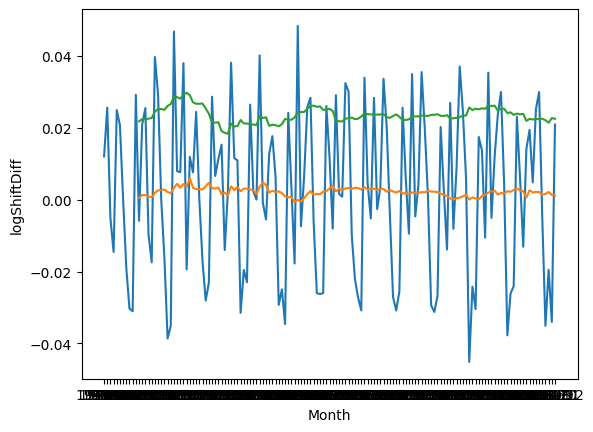

In [17]:
test_stationarity(log_df2.dropna(),'logShiftDiff')